[Yahtzee problem set Cornell](http://pi.math.cornell.edu/~mec/2006-2007/Probability/Yahtzee.htm#:~:text=Your%20objective%20is%20to%20get,to%20convince%20yourself%20of%20this)



**1** if you roll a die three times, what is the probablity that you get a six at least once?

In [78]:
1- (5/6)**3

0.42129629629629617

**1.1** if you roll two dice two times, what is the probability of getting 2 sixes?

In [2]:
from scipy.stats import binom

binom.pmf(1,2,1/36)

0.05401234567901235

**1.2** if you roll 3 dice 2 times what is the probability of getting 3 sixes?

In [3]:
binom.pmf(1,2,((1/6)**3))

0.00921639231824417

**2.** Suppose that on the first roll you get 5 5 4 3 2. If you pick up one of the fives and try for a large straight, what is the probability you will succeed in the two rolls that remain?

In [4]:
1 -((4/6)**2)

0.5555555555555556

**3** Suppose that on the first roll you get 6 5 5 3 2. If you pick up one of the fives and try for a large straight, what is the probability you will succeed in the two rolls that remain? Is it the same as in the previous problem?


In [5]:
1 - ((5/6)**2)

0.30555555555555547

**4** In the top six rows of the score card you want to score at least three of a given number (especially for the high numbers like 5 and 6). Suppose you roll 6, 6, 5, 2, 1 the first time, and re-roll all non 6's on the next two tries. What is the probability you will end up with at least three 6's? Exactly four 6's? A Yahtzee (five 6's)?

a more interesting version of this problem. given a first roll of `n` 6's, what is the probabilty I wind up with at least 3, 4 or 5 6's. 


naive solution is to generate and measure. I'll get back to this since it will be usefull to check my work.


a more directed solution would be to calculate this using [Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution). 

$$f(k,n,p) = \Pr(k;n,p) = \Pr(X = k) = \binom{n}{k}p^k(1-p)^{n-k}$$


find the probability for at least y discrete values to appear in a sequence, given a x sided die, j dice, and k rolls


 $$
 Y = \sum_{k=1}^{n} f(k,n,p) = f(1, 2, \frac{1}{6}) + f(2, 2, \frac{1}{6}) \approx 0.31
$$

where
- $n$ is the number of rolls
- $f(k,n,p)$ is the probability mass function of the Binomial Distribution
- $p$ is the probability of landing on the discrete value 
 


$p$ is a little dicey because it is dependent on the number of dice in play

the calculation for two dice is 
$$
f(1, 2, \frac{1}{6})
$$



from [Optimal Yahtzee](https://nb.jjk.is/doc/tree/work/Probability/Yahtzee/Markus_Felldin_and_Vinit_Sood.pdf)
Equation 3: Def. probability of going from n beneficial dice to m beneficial dice in one roll:
Equation 4: Def. probability of going from i beneficial dice to j beneficial dice in two rolls is the sum of
all ways of going from n to m in two tries:


$$
p(n, m)=C_{n, m} p^{m}(1-p)^{n-m}
$$
$$
p^{2}(i, j)=\sum_{k=1}^{5} p(i, k) p(k, j)
$$




$$
$$

In [2]:
#Python Code
import math

# Equation 1.1
def select(n,m):
    C = math.factorial(n)/(math.factorial(m)*math.factorial(n-m))
    return C

# Equation 1.3
def prob1(fro,to):
    ''' Calculates the chance of going from one amount of a number to
    another in one dice roll'''
    n = NUM_DICE-fro
    m = to-fro
    C = select(n,m)

    prob = C*math.pow(1.0/6.0,(m))*math.pow(5.0/6.0,(n-m))
    return prob

# Equation 1.4
def prob2(fro,to):
    '''Calculates the chance of going from one amount of a number to
    another in two dice rolls'''
    prob = 0
    for i in range(fro,to+1):
        prob += prob1(fro,i)*prob1(i,to)
    return prob


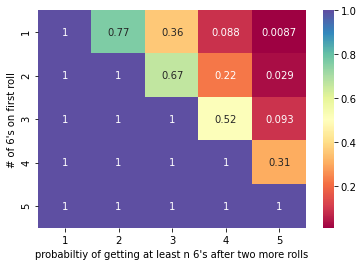

In [6]:
from pandas import pandas as pd
import seaborn as sns 

data = []
NUM_DICE=5

# initial i
for x in range(1,NUM_DICE+1):
    row = []
    dice_left = NUM_DICE - x
    # at least y
    for y in range(1,NUM_DICE+1):
        series =[]
        for n in range(NUM_DICE,y-1,-1):
            series.append(prob2(x,n))
        row.append(sum(series))
    data.append(row)
        
df = pd.DataFrame(data, index=[1,2,3,4,5], columns=[1,2,3,4,5])
df.index.name = "# of 6's on first roll"
df.columns.name = "probabiltiy of getting at least n 6's after two more rolls"
heatmap = sns.heatmap(df, annot=True, cmap='Spectral')
fig = heatmap.get_figure()
fig.savefig("two-rolls.png") 

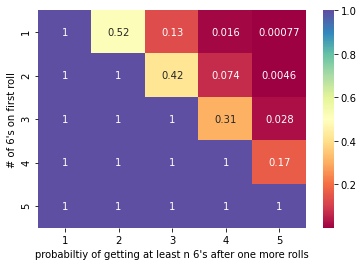

In [5]:
data = []
NUM_DICE=5

# initial i
for x in range(1,NUM_DICE+1):
    row = []
    dice_left = NUM_DICE - x
    # at least y
    for y in range(1,NUM_DICE+1):
        series =[]
        for n in range(NUM_DICE,y-1,-1):
            if x>n:
                continue
            series.append(prob1(x,n))
        row.append(sum(series))
    data.append(row)
        
df = pd.DataFrame(data, index=[1,2,3,4,5], columns=[1,2,3,4,5])
df.index.name = "# of 6's on first roll"
df.columns.name = "probabiltiy of getting at least n 6's after one more rolls"
heatmap = sns.heatmap(df, annot=True, cmap='Spectral');
fig = heatmap.get_figure()
fig.savefig("one-rolls.png") 

**5.** Suppose on the first roll you get 5, 4, 4, 3, 1. To try to get a large straight you pick up a 4 and the 1 and then roll again. If you get a 6 or 2 you keep it, and you re-roll the others. Of course if you happen to get a 2 and 1 on the second roll you stop and are happy. What is the probability you will end up with a large straight? What is the probability you will end up with a small straight?

Suppose instead you keep 5, 4, 3, 1, and re-roll 1 die. If you get a 2 you are happy. If you get a 6 you re-roll the 1. Otherwise you take a second chance at rolling the 2. What is the probability you will end up with a large straight? a small straight?

